## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('QueryResults2021.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head(5)

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail(5)

,m,TagName,Unnamed: 2
2070,2021-01-01 00:00:00,php,6383
2071,2021-01-01 00:00:00,ruby,609
2072,2021-01-01 00:00:00,go,665
2073,2021-01-01 00:00:00,perl,147
2074,2021-01-01 00:00:00,swift,2926


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(2075, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [10]:
df.columns= ['Data','Tag','Count']


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [43]:
df_group = df.groupby('Tag')
df_group_desc= df_group.describe()

In [44]:
df_group_desc

Count                                                      \
            count          mean          std    min      25%      50%   
Tag                                                                     
assembly    150.0    245.066667   112.634747    8.0   170.75    259.0   
c           150.0   2335.173333   981.523229   85.0  1795.75   2392.5   
c#          151.0   9664.158940  3471.625086    3.0  7751.50   9910.0   
c++         150.0   4732.833333  1863.281425  164.0  3853.00   4888.0   
delphi      150.0    315.506667   121.424584   14.0   207.00    309.0   
go          135.0    379.570370   264.446720    3.0    88.50    429.0   
java        150.0  11647.320000  5357.807500  222.0  8604.00  12245.5   
javascript  150.0  14392.220000  7368.714164  162.0  8237.25  16891.5   
perl        150.0    435.893333   219.144222   28.0   244.00    420.5   
php         150.0   9254.260000  4494.055103  161.0  5989.50   9184.5   
python      150.0  10909.340000  7825.789595  124.0  3688.00   9937.0   
r           148.0   2602.094595  1865.726425    1.0   613.50   2761.5   
ruby        150.0   1450.733333   765.588423   72.0   769.50   1483.0   
swift       141.0   2041.021277  1894.477732    1.0     4.00   2574.0   

                               
                 75%      max  
Tag                            
assembly      327.75    453.0  
c            3025.25   4575.0  
c#          12407.00  16224.0  
c++          6110.75   8691.0  
delphi        421.00    573.0  
go            615.50    879.0  
java        15903.00  22048.0  
javascript  20474.75  24993.0  
perl          600.25    958.0  
php         13147.25  18484.0  
python      16460.00  34182.0  
r            4157.75   7011.0  
ruby         2152.50   2954.0  
swift        3692.00   5159.0

Count                                                      \
            count          mean          std    min      25%      50%   
Tag                                                                     
assembly    150.0    245.066667   112.634747    8.0   170.75    259.0   
c           150.0   2335.173333   981.523229   85.0  1795.75   2392.5   
c#          151.0   9664.158940  3471.625086    3.0  7751.50   9910.0   
c++         150.0   4732.833333  1863.281425  164.0  3853.00   4888.0   
delphi      150.0    315.506667   121.424584   14.0   207.00    309.0   
go          135.0    379.570370   264.446720    3.0    88.50    429.0   
java        150.0  11647.320000  5357.807500  222.0  8604.00  12245.5   
javascript  150.0  14392.220000  7368.714164  162.0  8237.25  16891.5   
perl        150.0    435.893333   219.144222   28.0   244.00    420.5   
php         150.0   9254.260000  4494.055103  161.0  5989.50   9184.5   
python      150.0  10909.340000  7825.789595  124.0  3688.00   9937.0   
r           148.0   2602.094595  1865.726425    1.0   613.50   2761.5   
ruby        150.0   1450.733333   765.588423   72.0   769.50   1483.0   
swift       141.0   2041.021277  1894.477732    1.0     4.00   2574.0   

                               
                 75%      max  
Tag                            
assembly      327.75    453.0  
c            3025.25   4575.0  
c#          12407.00  16224.0  
c++          6110.75   8691.0  
delphi        421.00    573.0  
go            615.50    879.0  
java        15903.00  22048.0  
javascript  20474.75  24993.0  
perl          600.25    958.0  
php         13147.25  18484.0  
python      16460.00  34182.0  
r            4157.75   7011.0  
ruby         2152.50   2954.0  
swift        3692.00   5159.0

In [41]:
df_group_desc.columns

Index(['Count'], dtype='object')

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [39]:
df_group_desc.sort_values(('Count',  'mean'),ascending = False)

Count                                                      \
            count          mean          std    min      25%      50%   
Tag                                                                     
javascript  150.0  14392.220000  7368.714164  162.0  8237.25  16891.5   
java        150.0  11647.320000  5357.807500  222.0  8604.00  12245.5   
python      150.0  10909.340000  7825.789595  124.0  3688.00   9937.0   
c#          151.0   9664.158940  3471.625086    3.0  7751.50   9910.0   
php         150.0   9254.260000  4494.055103  161.0  5989.50   9184.5   
c++         150.0   4732.833333  1863.281425  164.0  3853.00   4888.0   
r           148.0   2602.094595  1865.726425    1.0   613.50   2761.5   
c           150.0   2335.173333   981.523229   85.0  1795.75   2392.5   
swift       141.0   2041.021277  1894.477732    1.0     4.00   2574.0   
ruby        150.0   1450.733333   765.588423   72.0   769.50   1483.0   
perl        150.0    435.893333   219.144222   28.0   244.00    420.5   
go          135.0    379.570370   264.446720    3.0    88.50    429.0   
delphi      150.0    315.506667   121.424584   14.0   207.00    309.0   
assembly    150.0    245.066667   112.634747    8.0   170.75    259.0   

                               
                 75%      max  
Tag                            
javascript  20474.75  24993.0  
java        15903.00  22048.0  
python      16460.00  34182.0  
c#          12407.00  16224.0  
php         13147.25  18484.0  
c++          6110.75   8691.0  
r            4157.75   7011.0  
c            3025.25   4575.0  
swift        3692.00   5159.0  
ruby         2152.50   2954.0  
perl          600.25    958.0  
go            615.50    879.0  
delphi        421.00    573.0  
assembly      327.75    453.0

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [48]:
df.head()

,Data,Tag,Count
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [50]:
df['Data'][1]

'2008-08-01 00:00:00'

In [51]:
type(df['Data'][1])

str

In [52]:
df['Data'] = pd.to_datetime(df['Data'])

In [53]:
df.head()

,Data,Tag,Count
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    2075 non-null   datetime64[ns]
 1   Tag     2075 non-null   object        
 2   Count   2075 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 40.6+ KB


In [55]:
reshaped_df = df.pivot(index='Data', columns='Tag', values='Count')

In [56]:
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Data,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1649.0,754.0,105.0,NaN,1136.0,640.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,725.0,127.0,616.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,958.0,580.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,307.0,2290.0,7315.0,4250.0,182.0,813.0,10791.0,19584.0,167.0,5671.0,25176.0,5379.0,572.0,3024.0
2020-10-01,389.0,2532.0,7064.0,4765.0,194.0,649.0,10847.0,19244.0,175.0,5493.0,26593.0,5795.0,552.0,2768.0
2020-11-01,415.0,2914.0,6861.0,4793.0,211.0,603.0,10376.0,18301.0,152.0,5598.0,26167.0,5619.0,588.0,2635.0


In [58]:
reshaped_df.fillna(0, inplace=True) 

In [59]:
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Data,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1649.0,754.0,105.0,0.0,1136.0,640.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,725.0,127.0,616.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,958.0,580.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,307.0,2290.0,7315.0,4250.0,182.0,813.0,10791.0,19584.0,167.0,5671.0,25176.0,5379.0,572.0,3024.0
2020-10-01,389.0,2532.0,7064.0,4765.0,194.0,649.0,10847.0,19244.0,175.0,5493.0,26593.0,5795.0,552.0,2768.0
2020-11-01,415.0,2914.0,6861.0,4793.0,211.0,603.0,10376.0,18301.0,152.0,5598.0,26167.0,5619.0,588.0,2635.0


In [60]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [61]:
import matplotlib.pyplot as plt


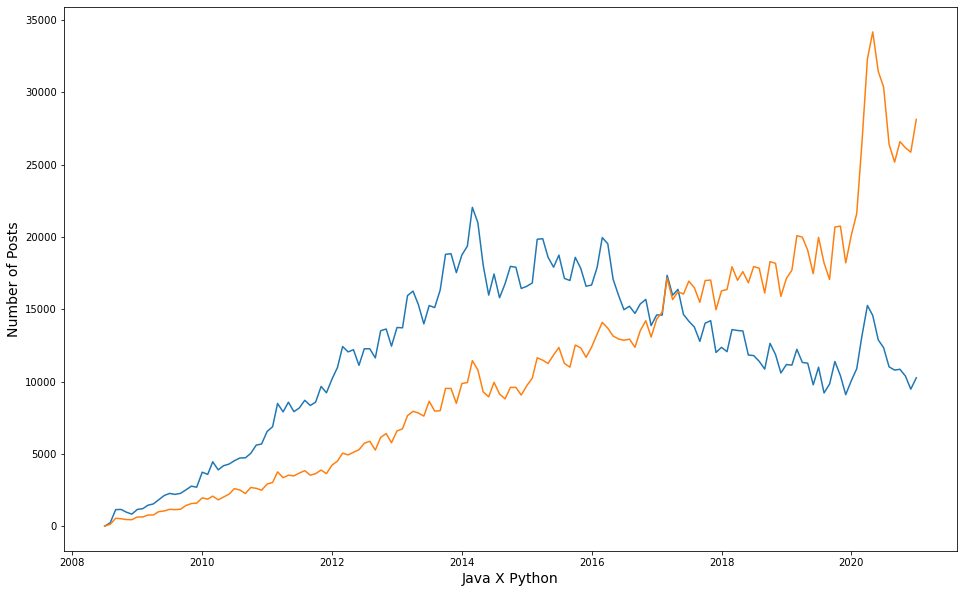

In [71]:
plt.figure(figsize=(16,10)) 
plt.ylabel('Number of Posts', fontsize=14)
plt.xlabel('Java X Python', fontsize=14)
plt.plot(reshaped_df.index,reshaped_df[['java','python']])

No handles with labels found to put in legend.


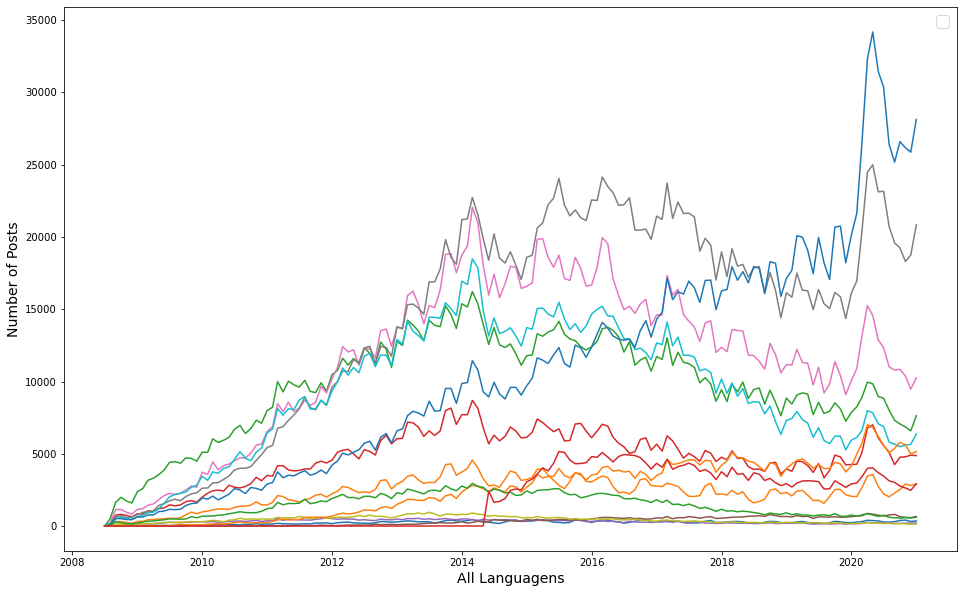

In [85]:
plt.figure(figsize=(16,10)) 
plt.ylabel('Number of Posts', fontsize=14)
plt.xlabel('All Languagens', fontsize=14)

for col in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[col])

plt.legend(fontsize=16)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

No handles with labels found to put in legend.


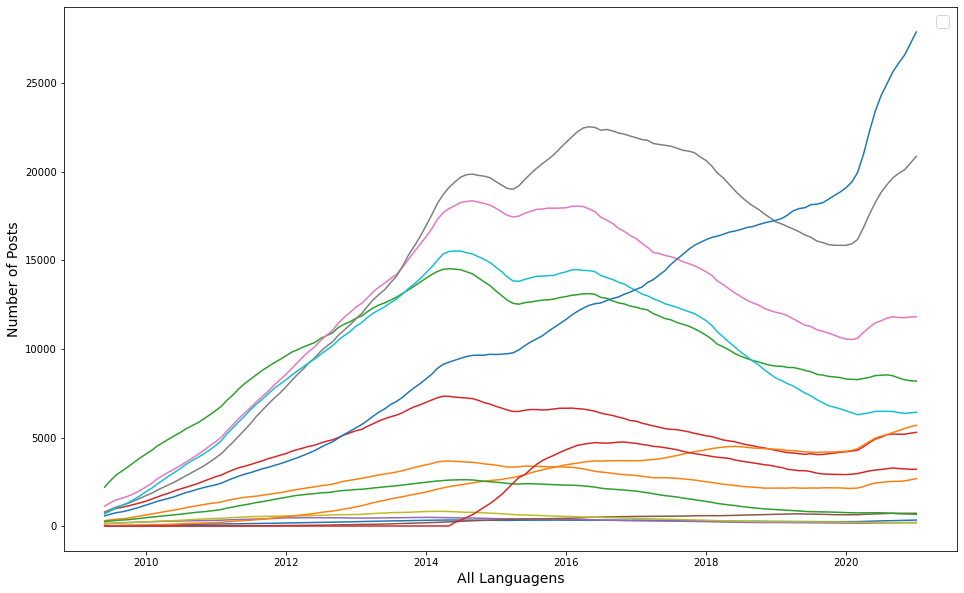

In [88]:
roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10)) 
plt.ylabel('Number of Posts', fontsize=14)
plt.xlabel('All Languagens', fontsize=14)

for col in roll_df.columns:
    plt.plot(roll_df.index, roll_df[col])

plt.legend(fontsize=16)
